# SampleInterview

### Import Libraries and File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
df = pd.read_excel('data.xlsx')

### Preliminary EDA - Level 1 EDA - (Exploration of Features Part) -- Before Mapping

In [3]:
### Rename the column names for familiarity
# This is if there is no requirement to use back the same column names.
# This is also only done if there is no pre-existing format, or if the col names don't follow conventional format.
# Normally will follow feature mart / dept format to name columns for easy understanding across board.
# Have also prepared an updated data dictionary within the powerpoint slides.
df_l1 = df.copy()
df_l1.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
new_col_dict = {'pc': 'c_pc', 'incm_typ': 'c_incm_typ', 'gn_occ': 'c_occ',
                 'num_prd': 'prod_nos', 'casatd_cnt': 'casa_td_nos', 'mthcasa': 'casa_bal_avg_mth',
                 'maxcasa': 'casa_bal_max_yr', 'mincasa': 'casa_bal_min_yr', 'drvcr': 'dr_cr_ratio_yr',
                 'mthtd': 'td_bal_avg', 'maxtd': 'td_bal_max', 'asset_value': 'asset_tot_val',
                 'hl_tag': 'loan_home_tag', 'al_tag': 'loan_auto_tag', 'pur_price_avg': 'prop_pur_price',
                 'ut_ave': 'ut_avg', 'maxut': 'ut_max', 'n_funds': 'funds_nos',
                 'cc_ave': 'cc_out_bal_avg_mth', 'max_mth_trn_amt': 'cc_txn_amt_max_mth', 'min_mth_trn_amt': 'cc_txn_amt_min_mth',
                 'avg_trn_amt': 'cc_txn_amt_avg_mth', 'ann_trn_amt': 'cc_txn_amt_yr', 'ann_n_trx': 'cc_txn_nos_yr'}
df_l1.rename(columns=new_col_dict, inplace=True)

In [4]:
df_l1.describe()

,c_id,c_age,c_pc,c_incm_typ,prod_nos,casa_td_nos,casa_bal_avg_mth,casa_bal_max_yr,casa_bal_min_yr,dr_cr_ratio_yr,td_bal_avg,td_bal_max,asset_tot_val,loan_home_tag,loan_auto_tag,prop_pur_price,ut_avg,ut_max,funds_nos,cc_out_bal_avg_mth,cc_txn_amt_max_mth,cc_txn_amt_min_mth,cc_txn_amt_avg_mth,cc_txn_amt_yr,cc_txn_nos_yr,cc_lmt
count,66083.000000,66083.000000,65597.000000,36617.000000,66083.000000,40991.000000,3.904500e+04,3.904500e+04,3.904500e+04,2.970800e+04,1.410000e+04,1.410000e+04,6.608300e+04,2368.0,5587.0,5.585000e+03,2.678000e+03,2.678000e+03,2678.000000,17073.000000,11733.000000,11733.000000,11733.000000,1.173300e+04,11733.000000,47744.000000
mean,41321.249111,52.357429,43249.703264,3.791709,2.097983,1.727867,1.614598e+04,1.544520e+04,1.317587e+04,3.663201e+04,1.075480e+05,6.738959e+04,3.606658e+04,1.0,1.0,1.247173e+05,4.562678e+04,5.207089e+04,1.447722,1433.442515,2812.945083,382.766932,848.137686,1.017765e+04,64.922952,5408.238040
std,27485.202813,14.323447,25671.057340,1.717852,1.093081,1.411307,6.683559e+04,6.505494e+04,5.443935e+04,1.330104e+05,1.770551e+05,1.166629e+05,1.161096e+05,0.0,0.0,8.775365e+04,5.447327e+04,6.140188e+04,0.920481,5016.886579,7971.455090,1028.178858,2690.348744,3.228418e+04,85.592620,13220.464962
min,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,-2.094051e+05,-2.094051e+05,-2.094051e+05,0.000000e+00,7.976200e+02,7.976200e+02,0.000000e+00,1.0,1.0,1.360000e+04,6.750000e-02,7.000000e-02,1.000000,0.000000,0.100000,0.040000,0.008333,1.000000e-01,1.000000,0.000000
25%,17402.000000,42.000000,21636.000000,2.000000,1.000000,1.000000,1.081280e+03,1.066780e+03,1.011870e+03,7.509496e+00,3.500000e+04,3.000000e+04,0.000000e+00,1.0,1.0,7.411100e+04,1.704585e+04,2.008031e+04,1.000000,16.196667,360.000000,26.820000,83.269167,9.992300e+02,8.000000,0.000000
50%,37643.000000,52.000000,41101.000000,4.000000,2.000000,1.000000,4.142560e+03,4.015310e+03,3.250600e+03,3.000000e+03,6.000000e+04,5.000000e+04,1.040360e+03,1.0,1.0,9.949764e+04,3.303736e+04,3.818595e+04,1.000000,126.095000,1193.390000,96.540000,327.046667,3.924560e+03,29.000000,0.000000
75%,62866.500000,63.000000,60776.000000,5.000000,3.000000,2.000000,1.362005e+04,1.302010e+04,1.088527e+04,3.000000e+04,1.200000e+05,7.500000e+04,3.124843e+04,1.0,1.0,1.538000e+05,5.767421e+04,6.547499e+04,2.000000,966.522500,3122.730000,366.000000,980.294167,1.176353e+04,88.000000,6900.000000
max,99996.000000,122.000000,99953.000000,8.000000,9.000000,39.000000,6.534839e+06,6.534839e+06,6.534839e+06,1.163500e+07,7.909500e+06,7.909500e+06,7.940605e+06,1.0,1.0,1.414900e+06,1.205991e+06,1.338365e+06,14.000000,201404.830000,296448.220000,24985.420000,129262.150830,1.551146e+06,1445.000000,380000.000000


#### c_id check

In [5]:
df_l1.columns

Index(['c_id', 'c_age', 'c_edu', 'c_hse', 'c_pc', 'c_incm_typ', 'c_occ', 'prod_nos', 'casa_td_nos', 'casa_bal_avg_mth', 'casa_bal_max_yr', 'casa_bal_min_yr', 'dr_cr_ratio_yr', 'td_bal_avg', 'td_bal_max', 'asset_tot_val', 'loan_home_tag', 'loan_auto_tag', 'prop_pur_price', 'ut_avg', 'ut_max', 'funds_nos', 'cc_out_bal_avg_mth', 'cc_txn_amt_max_mth', 'cc_txn_amt_min_mth', 'cc_txn_amt_avg_mth', 'cc_txn_amt_yr', 'cc_txn_nos_yr', 'cc_lmt', 'c_seg'], dtype='object')

In [6]:
sorted_df = df_l1.sort_values(by='c_id')
duplicated_ids = sorted_df[sorted_df.duplicated(subset='c_id', keep=False)]
display(duplicated_ids)

,c_id,c_age,c_edu,c_hse,c_pc,c_incm_typ,c_occ,prod_nos,casa_td_nos,casa_bal_avg_mth,casa_bal_max_yr,casa_bal_min_yr,dr_cr_ratio_yr,td_bal_avg,td_bal_max,asset_tot_val,loan_home_tag,loan_auto_tag,prop_pur_price,ut_avg,ut_max,funds_nos,cc_out_bal_avg_mth,cc_txn_amt_max_mth,cc_txn_amt_min_mth,cc_txn_amt_avg_mth,cc_txn_amt_yr,cc_txn_nos_yr,cc_lmt,c_seg
44084,0,31,NaN,NaN,20184.0,2.0,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.0,42800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
7920,0,61,NaN,NaN,29894.0,NaN,HOUSEWIFE,2,1.0,35373.02,35373.02,35373.02,3.346907,NaN,NaN,35373.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
34921,11,70,A-Levels,HDB 4-5 ROOM,22167.0,2.0,RETIREE,4,2.0,34867.23,34867.23,34867.23,10000.000000,20000.0,20000.0,83465.23,NaN,NaN,NaN,28174.140833,29621.03,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
31864,11,70,Masters,SEMI-DETACHED,9259.0,6.0,PMEB,2,1.0,47782.61,47782.61,47782.61,1879.050000,NaN,NaN,47782.61,NaN,NaN,NaN,NaN,NaN,NaN,35.685833,1250.55,14.9,157.6525,1891.83,46.0,25000.0,NORMAL
34922,19,40,NaN,NaN,71550.0,NaN,WHITE COLLAR,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44077,99900,35,NaN,NaN,3070.0,4.0,PMEB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,1.0,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
9700,99920,66,NaN,NaN,70054.0,NaN,RETIREE,3,3.0,5557.82,5557.82,5557.82,12.312444,80000.0,60000.0,85557.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
40445,99920,26,NaN,NaN,20391.0,NaN,BLUE COLLAR,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
7919,99931,35,Masters,NaN,40514.0,NaN,PMEB,2,1.0,16872.13,16872.13,16872.13,NaN,NaN,NaN,16872.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT


#### 'c_incm_typ' check

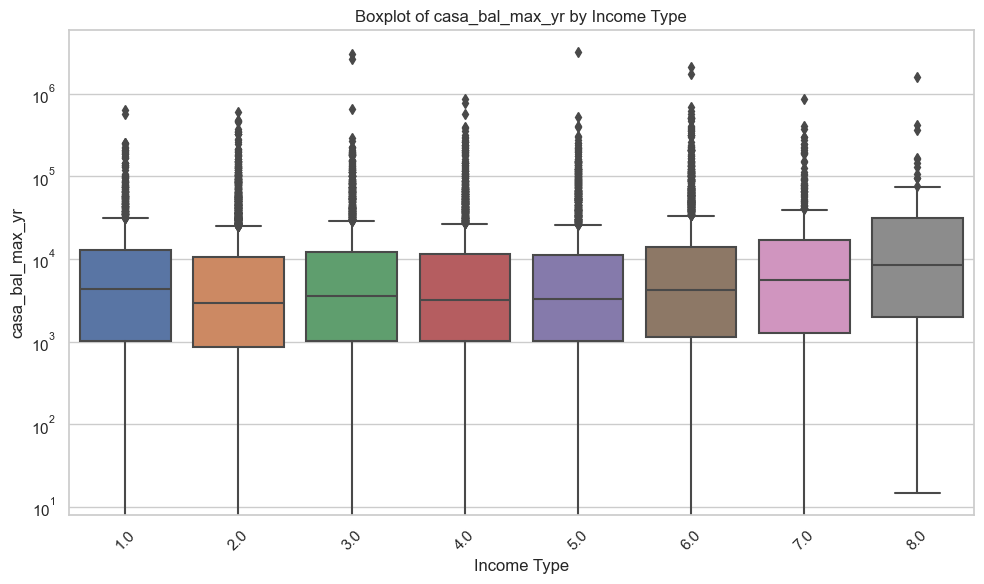

In [7]:
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.boxplot(x='c_incm_typ', y='casa_bal_max_yr', data=df_l1)

# Set labels and title
plt.xlabel('Income Type')
plt.ylabel('casa_bal_max_yr')
plt.title('Boxplot of casa_bal_max_yr by Income Type')
plt.yscale('log')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

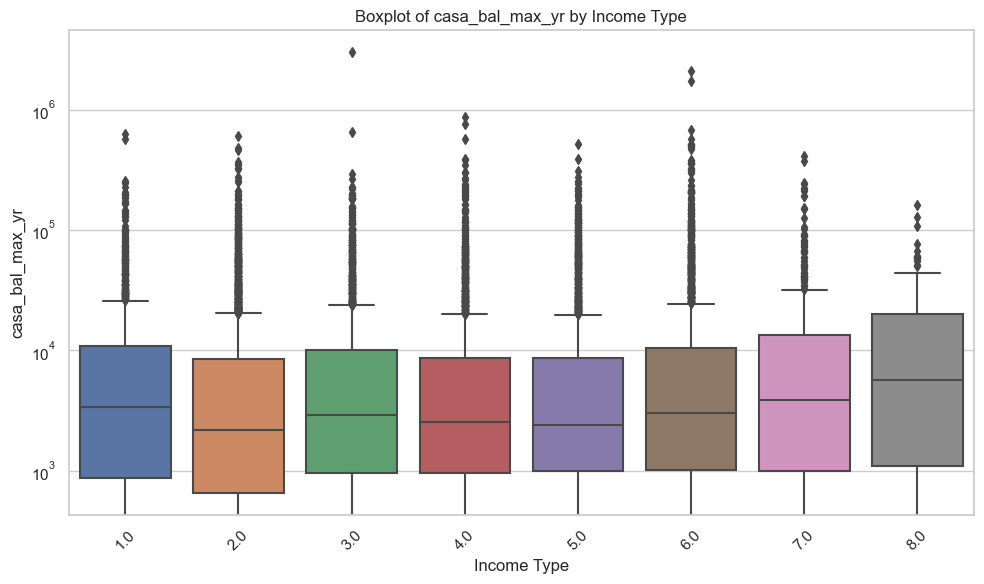

In [8]:
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.boxplot(x='c_incm_typ', y='casa_bal_min_yr', data=df_l1)

# Set labels and title
plt.xlabel('Income Type')
plt.ylabel('casa_bal_max_yr')
plt.title('Boxplot of casa_bal_max_yr by Income Type')
plt.yscale('log')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Since there is no significant result, and the overlap among the IQR is too huge, we will use 0 as a separate category instead of deciding to classify as 1 to 8

#### 'casa_bal_avg_mth', 'casa_bal_max_yr', 'casa_bal_min_yr' check

In [9]:
new_df = df_l1[['casa_bal_avg_mth', 'casa_bal_max_yr', 'casa_bal_min_yr']]
new_df

,casa_bal_avg_mth,casa_bal_max_yr,casa_bal_min_yr
0,6896.91,4899.08,910.88
1,51714.78,35740.55,1318.25
2,5420.09,5420.09,5420.09
3,13596.65,13596.65,13596.65
4,51639.18,32689.93,18949.25
...,...,...,...
66078,NaN,NaN,NaN
66079,NaN,NaN,NaN
66080,NaN,NaN,NaN
66081,NaN,NaN,NaN


In [10]:
new_df.describe()

,casa_bal_avg_mth,casa_bal_max_yr,casa_bal_min_yr
count,3.904500e+04,3.904500e+04,3.904500e+04
mean,1.614598e+04,1.544520e+04,1.317587e+04
std,6.683559e+04,6.505494e+04,5.443935e+04
min,-2.094051e+05,-2.094051e+05,-2.094051e+05
25%,1.081280e+03,1.066780e+03,1.011870e+03
50%,4.142560e+03,4.015310e+03,3.250600e+03
75%,1.362005e+04,1.302010e+04,1.088527e+04
max,6.534839e+06,6.534839e+06,6.534839e+06


In [11]:
null_casa_avg = new_df[new_df['casa_bal_avg_mth'].isnull()]
not_null_count = null_casa_avg[~null_casa_avg[['casa_bal_max_yr', 'casa_bal_min_yr']].isnull().any(axis=1)].shape[0]
print("Number of rows where 'casa_bal_avg_mth' is null, but 'casa_bal_max_yr' and 'casa_bal_min_yr' are not null:", not_null_count)

Number of rows where 'casa_bal_avg_mth' is null, but 'casa_bal_max_yr' and 'casa_bal_min_yr' are not null: 0


In [12]:
null_casa_max = new_df[new_df['casa_bal_max_yr'].isnull()]
not_null_count = null_casa_max[~null_casa_max[['casa_bal_min_yr','casa_bal_avg_mth']].isnull().any(axis=1)].shape[0]
print("Number of rows where 'casa_bal_max_yr' is null, but 'casa_bal_avg_mth' and 'casa_bal_min_yr' are not null:", not_null_count)

Number of rows where 'casa_bal_max_yr' is null, but 'casa_bal_avg_mth' and 'casa_bal_min_yr' are not null: 0


In [13]:
null_casa_min = new_df[new_df['casa_bal_min_yr'].isnull()]
not_null_count = null_casa_min[~null_casa_min[['casa_bal_max_yr','casa_bal_avg_mth']].isnull().any(axis=1)].shape[0]
print("Number of rows where 'casa_bal_min_yr' is null, but 'casa_bal_avg_mth' and 'casa_bal_max_yr' are not null:", not_null_count)

Number of rows where 'casa_bal_min_yr' is null, but 'casa_bal_avg_mth' and 'casa_bal_max_yr' are not null: 0


In [14]:
casa_avg_less_0 = df_l1[df_l1['casa_bal_avg_mth']<0]
casa_avg_less_0

,c_id,c_age,c_edu,c_hse,c_pc,c_incm_typ,c_occ,prod_nos,casa_td_nos,casa_bal_avg_mth,casa_bal_max_yr,casa_bal_min_yr,dr_cr_ratio_yr,td_bal_avg,td_bal_max,asset_tot_val,loan_home_tag,loan_auto_tag,prop_pur_price,ut_avg,ut_max,funds_nos,cc_out_bal_avg_mth,cc_txn_amt_max_mth,cc_txn_amt_min_mth,cc_txn_amt_avg_mth,cc_txn_amt_yr,cc_txn_nos_yr,cc_lmt,c_seg
4159,71206,48,Degree,HDB 4-5 ROOM,23816.0,7.0,PMEB,6,3.0,-36254.65,22140.08,-59433.14,87447.590000,NaN,NaN,23178.49,1.0,1.0,178844.0,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,10000.0,AFFLUENT
16199,89206,74,NaN,NaN,36547.0,5.0,PMEB,2,1.0,-209405.07,-209405.07,-209405.07,43440.120000,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
45228,13747,46,Degree,NaN,10672.0,6.0,PMEB,1,1.0,-494.28,-494.28,-494.28,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
49564,19438,65,Diploma,NaN,0.0,3.0,PMEB,4,1.0,-18686.29,-18686.29,-18686.29,9.969177,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,456.235,1443.83,892.39,405.9275,4871.13,5.0,5500.0,NORMAL


#### 'dr_cr_ratio_yr' check

In [15]:
sorted_dr_cr = df_l1.sort_values(by='dr_cr_ratio_yr', ascending=True)
# sorted_dr_cr.to_csv('sorted_dr_cr.csv', index=False)
sorted_dr_cr.head(200)

,c_id,c_age,c_edu,c_hse,c_pc,c_incm_typ,c_occ,prod_nos,casa_td_nos,casa_bal_avg_mth,casa_bal_max_yr,casa_bal_min_yr,dr_cr_ratio_yr,td_bal_avg,td_bal_max,asset_tot_val,loan_home_tag,loan_auto_tag,prop_pur_price,ut_avg,ut_max,funds_nos,cc_out_bal_avg_mth,cc_txn_amt_max_mth,cc_txn_amt_min_mth,cc_txn_amt_avg_mth,cc_txn_amt_yr,cc_txn_nos_yr,cc_lmt,c_seg
9070,19439,56,Degree,NaN,50280.0,6.0,PMEB,2,2.0,231200.63,231200.63,231200.63,0.0,2300000.00,2300000.00,2531200.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFFLUENT
60133,22971,59,NaN,NaN,60311.0,NaN,HOUSEWIFE,3,2.0,69554.46,54441.17,15113.29,0.0,NaN,NaN,69554.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
40735,6061,29,NaN,NaN,30370.0,NaN,PMEB,2,1.0,21704.55,21704.55,21704.55,0.0,NaN,NaN,21704.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
2439,54388,64,NaN,NaN,42312.0,NaN,HOUSEWIFE,3,3.0,2425.01,2425.01,2425.01,0.0,50000.00,30000.00,71936.31,NaN,NaN,NaN,17221.400833,19511.30,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFFLUENT
2433,51942,56,NaN,NaN,60759.0,NaN,PMEB,4,2.0,2623.49,2623.49,2623.49,0.0,NaN,NaN,16061.77,NaN,NaN,NaN,13541.711667,14739.62,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
60152,23340,71,NaN,NaN,60096.0,NaN,OTHERS,2,1.0,10769.68,10769.68,10769.68,0.0,NaN,NaN,10769.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
40602,3308,70,NaN,NaN,50237.0,NaN,HOUSEWIFE,3,2.0,182828.20,175472.41,7355.79,0.0,NaN,NaN,236723.57,NaN,NaN,NaN,53604.431667,54683.72,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NORMAL
10918,21642,29,NaN,NaN,10161.0,NaN,OTHERS,3,1.0,1056.67,1056.67,1056.67,0.0,NaN,NaN,54327.83,NaN,NaN,NaN,4439.263333,53271.16,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
10923,22439,41,NaN,NaN,30022.0,NaN,WHITE COLLAR,3,2.0,20009.78,20009.78,20009.78,0.0,180000.00,180000.00,200009.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AFFLUENT
60198,24191,39,Degree,HDB 4-5 ROOM,18721.0,5.0,PMEB,2,2.0,5009.82,5009.82,5009.82,0.0,50000.00,50000.00,55009.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL


In [16]:
temp_df = df_l1[['dr_cr_ratio_yr','c_seg']]
temp_df_affluent = temp_df[temp_df['c_seg']=='AFFLUENT']
temp_df_normal = temp_df[temp_df['c_seg']=='NORMAL']

In [17]:
temp_df_affluent.describe()

,dr_cr_ratio_yr
count,8.149000e+03
mean,6.338745e+04
std,2.017634e+05
min,0.000000e+00
25%,9.375899e+00
50%,9.000000e+03
75%,6.720000e+04
max,1.163500e+07


In [18]:
temp_df_normal.describe()

,dr_cr_ratio_yr
count,2.155900e+04
mean,2.651883e+04
std,9.284597e+04
min,0.000000e+00
25%,6.811676e+00
50%,2.247090e+03
75%,2.072986e+04
max,3.800000e+06


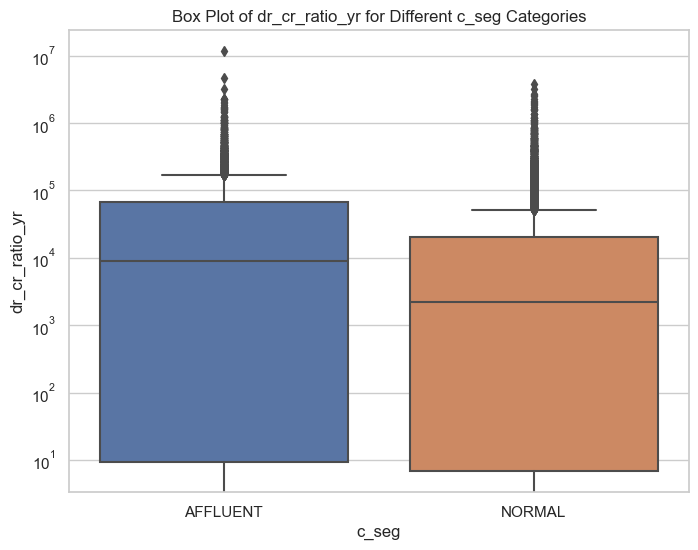

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for 'AFFLUENT' and 'NORMAL' categories and non-null 'dr_cr_ratio_yr'
filtered_df = df_l1

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='c_seg', y='dr_cr_ratio_yr', data=filtered_df)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Box Plot of dr_cr_ratio_yr for Different c_seg Categories')
plt.xlabel('c_seg')
plt.ylabel('dr_cr_ratio_yr')
plt.show()


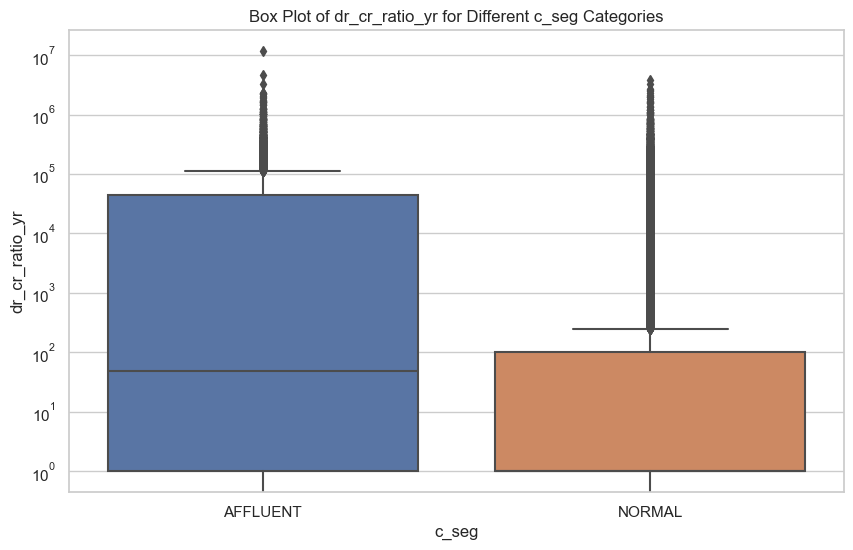

In [20]:
# Filter the DataFrame for 'AFFLUENT' and 'NORMAL' categories and non-null 'dr_cr_ratio_yr'
# If we were to use fillna = 0, the 
filtered_df = df_l1.fillna({'dr_cr_ratio_yr':1})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='c_seg', y='dr_cr_ratio_yr', data=filtered_df)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Box Plot of dr_cr_ratio_yr for Different c_seg Categories')
plt.xlabel('c_seg')
plt.ylabel('dr_cr_ratio_yr')
plt.show()


In [21]:
temp_df = df_l1[['dr_cr_ratio_yr','c_seg']]
temp_df_affluent = temp_df[temp_df['c_seg']=='AFFLUENT'].fillna({'dr_cr_ratio_yr':1})
temp_df_affluent.describe()

,dr_cr_ratio_yr
count,1.092600e+04
mean,4.727687e+04
std,1.764159e+05
min,0.000000e+00
25%,1.000000e+00
50%,4.778144e+01
75%,4.451493e+04
max,1.163500e+07


In [22]:
temp_df_normal = temp_df[temp_df['c_seg']=='NORMAL'].fillna({'dr_cr_ratio_yr':1})
temp_df_normal.describe()

,dr_cr_ratio_yr
count,5.515700e+04
mean,1.036592e+04
std,5.947053e+04
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+02
max,3.800000e+06


In [23]:
df_l1.columns

Index(['c_id', 'c_age', 'c_edu', 'c_hse', 'c_pc', 'c_incm_typ', 'c_occ', 'prod_nos', 'casa_td_nos', 'casa_bal_avg_mth', 'casa_bal_max_yr', 'casa_bal_min_yr', 'dr_cr_ratio_yr', 'td_bal_avg', 'td_bal_max', 'asset_tot_val', 'loan_home_tag', 'loan_auto_tag', 'prop_pur_price', 'ut_avg', 'ut_max', 'funds_nos', 'cc_out_bal_avg_mth', 'cc_txn_amt_max_mth', 'cc_txn_amt_min_mth', 'cc_txn_amt_avg_mth', 'cc_txn_amt_yr', 'cc_txn_nos_yr', 'cc_lmt', 'c_seg'], dtype='object')

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

new_df = df_l1.copy() 

# Define features to be used for imputation
num_features = ['dr_cr_ratio_yr',
                'c_age', 'c_incm_typ', 'prod_nos',
                'casa_td_nos', 'casa_bal_avg_mth', 'casa_bal_max_yr', 'casa_bal_min_yr',
                'td_bal_avg', 'td_bal_max', 'asset_tot_val', 'loan_home_tag', 'loan_auto_tag', 'prop_pur_price',
                'ut_avg', 'ut_max', 'funds_nos', 
                'cc_out_bal_avg_mth', 'cc_txn_amt_max_mth', 'cc_txn_amt_min_mth', 'cc_txn_amt_avg_mth', 'cc_txn_amt_yr',
                'cc_txn_nos_yr', 'cc_lmt']

cat_features = ['c_edu', 'c_hse', 'c_occ', 'c_seg']

# Create a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

# Create an instance of IterativeImputer
imputation_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', IterativeImputer(random_state=0, max_iter=100))
])

# Fit the imputer on the selected features
imputation_pipeline.fit(new_df[num_features+cat_features])

# Impute missing values in 'prop_pur_price' using the fitted imputer
new_df['dr_cr_ratio_yr'] = imputation_pipeline.transform(new_df[num_features+cat_features])[:, 0]

C:\Users\lim\.conda\envs\maybankinterview\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [25]:
# Shows newly imputed number (not null)
new_df[new_df['c_id']==7262]

,c_id,c_age,c_edu,c_hse,c_pc,c_incm_typ,c_occ,prod_nos,casa_td_nos,casa_bal_avg_mth,casa_bal_max_yr,casa_bal_min_yr,dr_cr_ratio_yr,td_bal_avg,td_bal_max,asset_tot_val,loan_home_tag,loan_auto_tag,prop_pur_price,ut_avg,ut_max,funds_nos,cc_out_bal_avg_mth,cc_txn_amt_max_mth,cc_txn_amt_min_mth,cc_txn_amt_avg_mth,cc_txn_amt_yr,cc_txn_nos_yr,cc_lmt,c_seg
28,7262,55,NaN,NaN,71002.0,5.0,PMEB,2,NaN,NaN,NaN,NaN,-76961.445853,NaN,NaN,30000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFFLUENT


In [26]:
# Shows existing number of 170084.49 which is correct.
new_df[new_df['c_id']==15063]

,c_id,c_age,c_edu,c_hse,c_pc,c_incm_typ,c_occ,prod_nos,casa_td_nos,casa_bal_avg_mth,casa_bal_max_yr,casa_bal_min_yr,dr_cr_ratio_yr,td_bal_avg,td_bal_max,asset_tot_val,loan_home_tag,loan_auto_tag,prop_pur_price,ut_avg,ut_max,funds_nos,cc_out_bal_avg_mth,cc_txn_amt_max_mth,cc_txn_amt_min_mth,cc_txn_amt_avg_mth,cc_txn_amt_yr,cc_txn_nos_yr,cc_lmt,c_seg
55,15063,58,Masters,PRIVATE CONDOMINIUM,69361.0,6.0,PMEB,7,4.0,3202.48,2455.06,747.42,170084.49,150000.0,100000.0,180538.2,1.0,NaN,NaN,23604.844167,27335.72,1.0,8677.421667,13520.24,1623.68,6074.324167,72891.89,388.0,66000.0,AFFLUENT


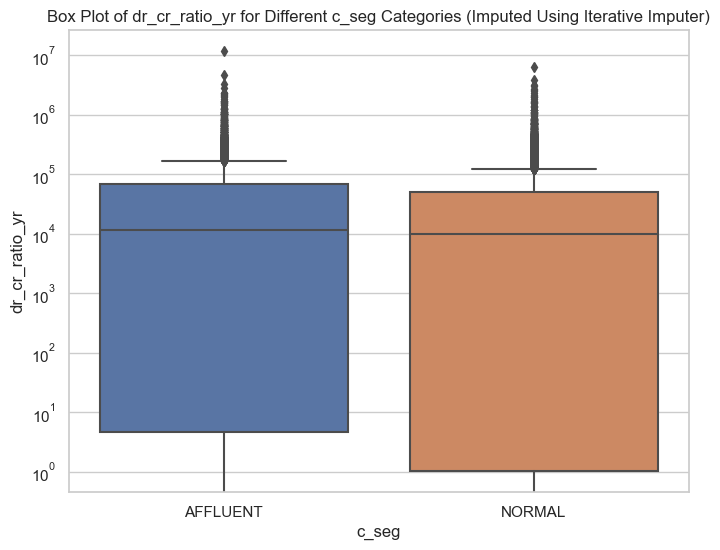

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for 'AFFLUENT' and 'NORMAL' categories and non-null 'dr_cr_ratio_yr'
filtered_df = new_df

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='c_seg', y='dr_cr_ratio_yr', data=filtered_df)
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.title('Box Plot of dr_cr_ratio_yr for Different c_seg Categories (Imputed Using Iterative Imputer)')
plt.xlabel('c_seg')
plt.ylabel('dr_cr_ratio_yr')
plt.show()

#### 'td_bal_avg', 'td_bal_max' check

In [28]:
new_df = df_l1[['td_bal_avg', 'td_bal_max']]
new_df

,td_bal_avg,td_bal_max
0,105000.00,25000.00
1,575571.97,135026.15
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
66078,NaN,NaN
66079,NaN,NaN
66080,NaN,NaN
66081,NaN,NaN


In [29]:
null_td_avg = new_df[new_df['td_bal_avg'].isnull()]
not_null_count = null_td_avg[~null_td_avg[['td_bal_max']].isnull().any(axis=1)].shape[0]
print("Number of rows where 'td_bal_avg' is null, but 'td_bal_max' is not null:", not_null_count)

Number of rows where 'td_bal_avg' is null, but 'td_bal_max' is not null: 0


In [30]:
null_td_max = new_df[new_df['td_bal_max'].isnull()]
not_null_count = null_td_max[~null_td_max[['td_bal_avg']].isnull().any(axis=1)].shape[0]
print("Number of rows where 'td_bal_max' is null, but 'td_bal_avg' is not null:", not_null_count)

Number of rows where 'td_bal_max' is null, but 'td_bal_avg' is not null: 0


#### 'prop_pur_price' check

In [31]:
new_df = df_l1[['prop_pur_price','loan_home_tag']]
new_df = new_df.fillna({'loan_home_tag':0})
pd.options.display.float_format = '{:.2f}'.format
new_df.describe()

,prop_pur_price,loan_home_tag
count,5585.00,66083.00
mean,124717.34,0.04
std,87753.65,0.19
min,13600.00,0.00
25%,74111.00,0.00
50%,99497.64,0.00
75%,153800.00,0.00
max,1414900.00,1.00


In [32]:
new_df = df_l1[['prop_pur_price','loan_home_tag']]
null_loan_home = new_df[new_df['loan_home_tag'].isnull()]
not_null_count = null_loan_home[~null_loan_home[['prop_pur_price']].isnull().any(axis=1)].shape[0]
print("Number of rows where 'loan_home_tag' is null, but 'prop_pur_price' is not null:", not_null_count)

Number of rows where 'loan_home_tag' is null, but 'prop_pur_price' is not null: 5460


In [33]:
new_df = df_l1[['prop_pur_price','loan_home_tag']]
null_loan_home = new_df[new_df['prop_pur_price'].isnull()]
not_null_count = null_loan_home[~null_loan_home[['loan_home_tag']].isnull().any(axis=1)].shape[0]
print("Number of rows where 'prop_pur_price' is null, but 'loan_home_tag' is not null:", not_null_count)

Number of rows where 'prop_pur_price' is null, but 'loan_home_tag' is not null: 2243


In [34]:
new_df = df_l1[['prop_pur_price','loan_home_tag']]
condition = new_df['loan_home_tag'] == 1
new_df[condition].describe()

,prop_pur_price,loan_home_tag
count,125.00,2368.00
mean,148833.26,1.00
std,89057.32,0.00
min,23000.00,1.00
25%,86800.00,1.00
50%,120999.00,1.00
75%,200000.00,1.00
max,480000.00,1.00


#### 'ut_avg', 'ut_max', 'funds_nos' check

In [35]:
new_df = df_l1[['ut_avg', 'ut_max', 'funds_nos']]
new_df

,ut_avg,ut_max,funds_nos
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,58424.55,59600.88,1.00
3,28863.18,33902.58,1.00
4,15060.34,15619.29,1.00
...,...,...,...
66078,NaN,NaN,NaN
66079,NaN,NaN,NaN
66080,NaN,NaN,NaN
66081,NaN,NaN,NaN


In [36]:
null_ut_avg = new_df[new_df['ut_avg'].isnull()]
not_null_count = null_ut_avg[~null_ut_avg[['ut_max', 'funds_nos']].isnull().any(axis=1)].shape[0]
print("Number of rows where 'ut_avg' is null, but 'ut_max' and 'funds_nos' are not null:", not_null_count)

Number of rows where 'ut_avg' is null, but 'ut_max' and 'funds_nos' are not null: 0


In [37]:
null_ut_max = new_df[new_df['ut_max'].isnull()]
not_null_count = null_ut_max[~null_ut_max[['ut_avg', 'funds_nos']].isnull().any(axis=1)].shape[0]
print("Number of rows where 'ut_max' is null, but 'ut_avg' and 'funds_nos' are not null:", not_null_count)

Number of rows where 'ut_max' is null, but 'ut_avg' and 'funds_nos' are not null: 0


In [38]:
null_fund_nos = new_df[new_df['funds_nos'].isnull()]
not_null_count = null_ut_max[~null_ut_max[['ut_avg', 'ut_max']].isnull().any(axis=1)].shape[0]
print("Number of rows where 'funds_nos' is null, but 'ut_avg' and 'ut_max' are not null:", not_null_count)

Number of rows where 'funds_nos' is null, but 'ut_avg' and 'ut_max' are not null: 0


#### 'cc_out_bal_ave_mth', 'cc_txn_amt_max_mth', 'cc_txn_amt_min_mth', 'cc_txn_amt_avg_mth', 'cc_txn_amt_yr', 'cc_txn_nos_yr', 'cc_lmt'

In [39]:
new_df = df_l1[['cc_out_bal_avg_mth', 'cc_txn_amt_max_mth', 'cc_txn_amt_min_mth', 'cc_txn_amt_avg_mth', 'cc_txn_amt_yr', 'cc_txn_nos_yr', 'cc_lmt']]
new_df.head(500)

,cc_out_bal_avg_mth,cc_txn_amt_max_mth,cc_txn_amt_min_mth,cc_txn_amt_avg_mth,cc_txn_amt_yr,cc_txn_nos_yr,cc_lmt
0,13.23,NaN,NaN,NaN,NaN,NaN,34500.00
1,727.63,8530.88,273.44,2296.71,27560.56,88.00,4000.00
2,367.39,523.35,122.13,283.58,3402.97,78.00,5000.00
3,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,NaN,NaN,NaN,NaN,NaN,NaN,0.00
5,NaN,NaN,NaN,NaN,NaN,NaN,0.00
6,NaN,NaN,NaN,NaN,NaN,NaN,0.00
7,NaN,NaN,NaN,NaN,NaN,NaN,0.00
8,229.29,406.30,40.18,177.11,2125.37,102.00,15000.00
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
def chk_nulls(df_input, list_of_columns):
    for x in range(len(list_of_columns)):
        temp_list = list_of_columns.copy()
        col_to_chk = temp_list.pop(x)
        null_df = df_input[df_input[col_to_chk].isnull()]
        not_null_count = null_df[~null_df[temp_list].isnull().any(axis=1)].shape[0]
        print(f"Number of rows where {col_to_chk} is null, but {', '.join(str(x) for x in temp_list)} are not null:{not_null_count}")

In [41]:
# All 5 columns are null when either one of them are null.
list_to_chk = ['cc_txn_amt_max_mth', 'cc_txn_amt_min_mth', 'cc_txn_amt_avg_mth', 'cc_txn_amt_yr', 'cc_txn_nos_yr']
chk_nulls(new_df, list_to_chk)

Number of rows where cc_txn_amt_max_mth is null, but cc_txn_amt_min_mth, cc_txn_amt_avg_mth, cc_txn_amt_yr, cc_txn_nos_yr are not null:0
Number of rows where cc_txn_amt_min_mth is null, but cc_txn_amt_max_mth, cc_txn_amt_avg_mth, cc_txn_amt_yr, cc_txn_nos_yr are not null:0
Number of rows where cc_txn_amt_avg_mth is null, but cc_txn_amt_max_mth, cc_txn_amt_min_mth, cc_txn_amt_yr, cc_txn_nos_yr are not null:0
Number of rows where cc_txn_amt_yr is null, but cc_txn_amt_max_mth, cc_txn_amt_min_mth, cc_txn_amt_avg_mth, cc_txn_nos_yr are not null:0
Number of rows where cc_txn_nos_yr is null, but cc_txn_amt_max_mth, cc_txn_amt_min_mth, cc_txn_amt_avg_mth, cc_txn_amt_yr are not null:0


In [42]:
list_to_chk = ['cc_out_bal_avg_mth', 'cc_txn_nos_yr']
chk_nulls(new_df, list_to_chk)

Number of rows where cc_out_bal_avg_mth is null, but cc_txn_nos_yr are not null:123
Number of rows where cc_txn_nos_yr is null, but cc_out_bal_avg_mth are not null:5463


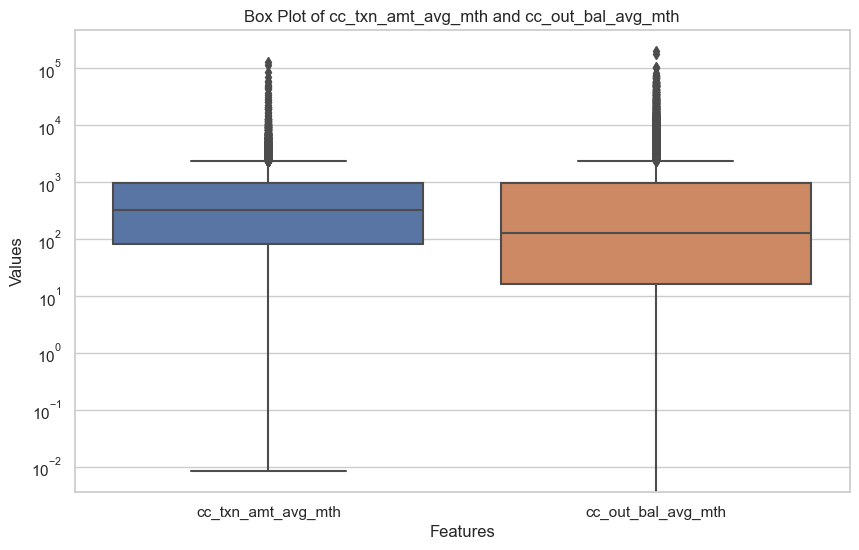

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_df[['cc_txn_amt_avg_mth', 'cc_out_bal_avg_mth']])
plt.title('Box Plot of cc_txn_amt_avg_mth and cc_out_bal_avg_mth')
plt.yscale('log')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [44]:
new_df[['cc_txn_amt_avg_mth', 'cc_out_bal_avg_mth']].describe()

,cc_txn_amt_avg_mth,cc_out_bal_avg_mth
count,11733.00,17073.00
mean,848.14,1433.44
std,2690.35,5016.89
min,0.01,0.00
25%,83.27,16.20
50%,327.05,126.09
75%,980.29,966.52
max,129262.15,201404.83


In [45]:
temp_df = new_df[new_df['cc_txn_amt_avg_mth'].notnull()][['cc_txn_amt_avg_mth', 'cc_out_bal_avg_mth']]
temp_df['out_bal_more'] = temp_df['cc_out_bal_avg_mth'] > temp_df['cc_txn_amt_avg_mth']
temp_df['diff'] = temp_df['cc_out_bal_avg_mth'] - temp_df['cc_txn_amt_avg_mth']
display(temp_df.head(100))
print(temp_df['out_bal_more'].value_counts())
temp_df['diff'].describe()

,cc_txn_amt_avg_mth,cc_out_bal_avg_mth,out_bal_more,diff
1,2296.71,727.63,False,-1569.08
2,283.58,367.39,True,83.81
8,177.11,229.29,True,52.17
10,312.93,312.98,True,0.05
18,33.95,2.02,False,-31.93
20,320.63,2289.01,True,1968.37
27,299.42,1597.42,True,1298.00
37,479.36,497.62,True,18.25
38,84.91,87.76,True,2.85
46,253.69,50.50,False,-203.19


out_bal_more
True     6519
False    5214
Name: count, dtype: int64


count     11610.00
mean        815.84
std        5064.92
min     -104686.02
25%         -60.49
50%          13.50
75%         228.04
max      198589.69
Name: diff, dtype: float64

### Preliminary EDA - Level 1 EDA - (Exploration of Features Part) -- During / After Mapping
Transformation of Fill NA / Change Datatypes done

In [46]:
df_l1 = df.copy()
df_l1.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
new_col_dict = {'pc': 'c_pc', 'incm_typ': 'c_incm_typ', 'gn_occ': 'c_occ',
                 'num_prd': 'prod_nos', 'casatd_cnt': 'casa_td_nos', 'mthcasa': 'casa_bal_avg_mth',
                 'maxcasa': 'casa_bal_max_yr', 'mincasa': 'casa_bal_min_yr', 'drvcr': 'dr_cr_ratio_yr',
                 'mthtd': 'td_bal_avg', 'maxtd': 'td_bal_max', 'asset_value': 'asset_tot_val',
                 'hl_tag': 'loan_home_tag', 'al_tag': 'loan_auto_tag', 'pur_price_avg': 'prop_pur_price',
                 'ut_ave': 'ut_avg', 'maxut': 'ut_max', 'n_funds': 'funds_nos',
                 'cc_ave': 'cc_out_bal_avg_mth', 'max_mth_trn_amt': 'cc_txn_amt_max_mth', 'min_mth_trn_amt': 'cc_txn_amt_min_mth',
                 'avg_trn_amt': 'cc_txn_amt_avg_mth', 'ann_trn_amt': 'cc_txn_amt_yr', 'ann_n_trx': 'cc_txn_nos_yr'}
df_l1.rename(columns=new_col_dict, inplace=True)
fill_values = {'c_edu': 'Unknown', 'c_hse': 'UNKNOWN', 'c_pc': 0, 'c_incm_typ': 0,
               'c_occ': 'UNKNOWN',
               'casa_td_nos': 0, 'casa_bal_avg_mth': 0, 'casa_bal_max_yr': 0, 'casa_bal_min_yr': 0,
               'td_bal_avg': 0, 'td_bal_max': 0,
               'loan_home_tag':0, 'loan_auto_tag': 0,
               'ut_avg': 0, 'ut_max': 0, 'funds_nos': 0,
               'cc_txn_amt_max_mth': 0, 'cc_txn_amt_min_mth': 0, 'cc_txn_amt_avg_mth': 0,
               'cc_txn_amt_yr': 0, 'cc_txn_nos_yr': 0, 'cc_lmt': 0}
df_l1.fillna(fill_values, inplace=True)

df_l1['dr_cr_ratio_yr'] = df_l1['dr_cr_ratio_yr'].fillna(df_l1['c_seg'].map({'AFFLUENT': 9000, 'NORMAL': 2247}))
df_l1['prop_pur_price'] = df_l1['prop_pur_price'].fillna(df_l1['loan_home_tag'].map({1: 120999, 0: 0}))
df_l1['cc_out_bal_avg_mth'] = df_l1['cc_out_bal_avg_mth'].fillna(df_l1['cc_txn_amt_avg_mth'])
df_l1['u_id'] = range(1,len(df_l1)+1)
dtype_mapping = {'c_id': str, 'c_age': int, 'c_pc': int, 'c_incm_typ': int, 'prod_nos': int,
                 'casa_td_nos': int, 'loan_home_tag': int, 'loan_auto_tag': int,
                 'funds_nos': int, 'cc_txn_nos_yr': int, 'u_id': int}

df_l1 = df_l1.astype(dtype_mapping)

#### c_edu

In [47]:
distinct_values = df_l1['c_edu'].unique()
print(distinct_values)
print(df_l1['c_edu'].value_counts())

['Masters' 'O-Levels' 'A-Levels' 'Unknown' 'Degree' 'Diploma'
 'Professional Qualifications' 'Technical/Vocational Qualifications'
 'Others' 'PHD/Doctorate' 'Below O-Levels']
c_edu
Unknown                                38464
Degree                                 11222
Diploma                                 6329
O-Levels                                3928
Masters                                 2628
A-Levels                                1177
Others                                   973
Below O-Levels                           422
Professional Qualifications              383
PHD/Doctorate                            367
Technical/Vocational Qualifications      190
Name: count, dtype: int64


In [48]:
c_edu_mapping = {'Unknown': 0, 'Others': 0, 'Below O-Levels':1,
                 'O-Levels': 2, 'A-Levels': 3, 'Technical/Vocational Qualifications': 4,
                 'Diploma': 5, 'Degree': 6, 'Professional Qualifications': 7, 'Masters': 8,
                 'PHD/Doctorate':9}
df_l1['c_edu_encoded'] = df_l1['c_edu'].map(c_edu_mapping)
print(df_l1['c_edu_encoded'].value_counts())

c_edu_encoded
0    39437
6    11222
5     6329
2     3928
8     2628
3     1177
1      422
7      383
9      367
4      190
Name: count, dtype: int64


#### c_hse

In [49]:
distinct_values = df_l1['c_hse'].unique()
print(distinct_values)
print(df_l1['c_hse'].value_counts())

['EXECUTIVE CONDOMINIUM' 'PRIVATE CONDOMINIUM' 'UNKNOWN' 'HDB 4-5 ROOM'
 'SEMI-DETACHED' 'TERRACE' 'HDB 1-3 ROOM' 'PRIVATE APARTMENT' 'BUNGALOW'
 'HDB EXECUTIVE APARTMENT/ MANSIONETTE' 'SHOPHOUSE' 'INDUSTRIAL BUILDING'
 'COMMERICAL BUILDING' 'OFFICE' 'HOTEL/ SERVICE APARTMENT']
c_hse
UNKNOWN                                 43916
HDB 4-5 ROOM                            15257
PRIVATE CONDOMINIUM                      3431
SEMI-DETACHED                            2406
TERRACE                                   486
SHOPHOUSE                                 138
EXECUTIVE CONDOMINIUM                      98
PRIVATE APARTMENT                          97
HDB 1-3 ROOM                               95
HDB EXECUTIVE APARTMENT/ MANSIONETTE       94
BUNGALOW                                   61
INDUSTRIAL BUILDING                         1
COMMERICAL BUILDING                         1
OFFICE                                      1
HOTEL/ SERVICE APARTMENT                    1
Name: count, dtype: int64

In [50]:
c_hse_mapping = {'UNKNOWN': 0,
                 'INDUSTRIAL BUILDING': 1, 'COMMERICAL BUILDING': 1, 'OFFICE': 1,
                 'HOTEL/ SERVICE APARTMENT': 1, 'SHOPHOUSE':1,
                 'HDB 1-3 ROOM': 2, 'HDB 4-5 ROOM': 3, 'HDB EXECUTIVE APARTMENT/ MANSIONETTE': 4,
                 'PRIVATE CONDOMINIUM': 5, 'EXECUTIVE CONDOMINIUM': 5, 'PRIVATE APARTMENT': 5,
                 'TERRACE': 6, 'SEMI-DETACHED': 7, 'BUNGALOW': 8}
df_l1['c_hse_encoded'] = df_l1['c_hse'].map(c_hse_mapping)
print(df_l1['c_hse_encoded'].value_counts())

c_hse_encoded
0    43916
3    15257
5     3626
7     2406
6      486
1      142
2       95
4       94
8       61
Name: count, dtype: int64


#### c_occ

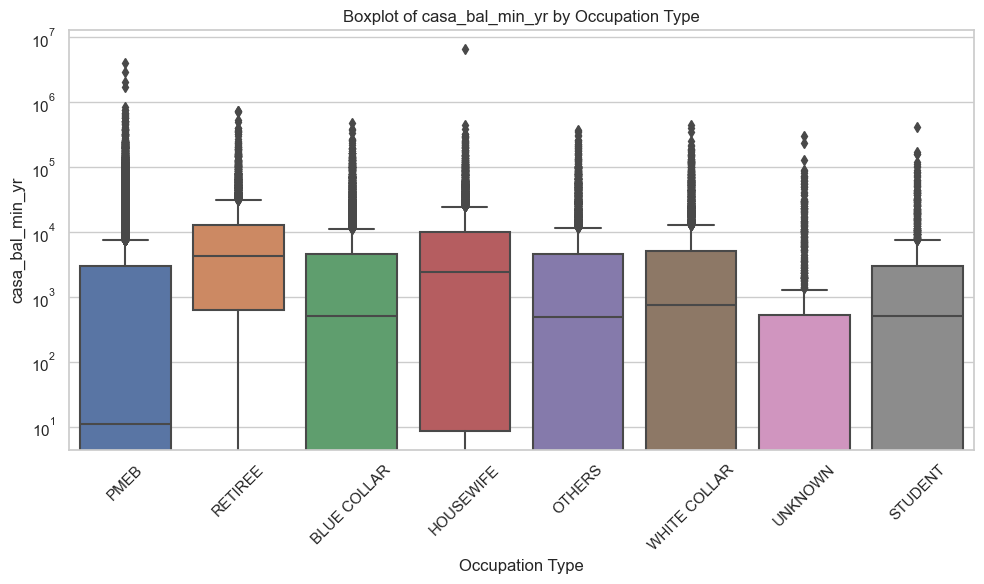

In [51]:
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.boxplot(x='c_occ', y='casa_bal_min_yr', data=df_l1)

# Set labels and title
plt.xlabel('Occupation Type')
plt.ylabel('casa_bal_min_yr')
plt.title('Boxplot of casa_bal_min_yr by Occupation Type')
plt.yscale('log')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

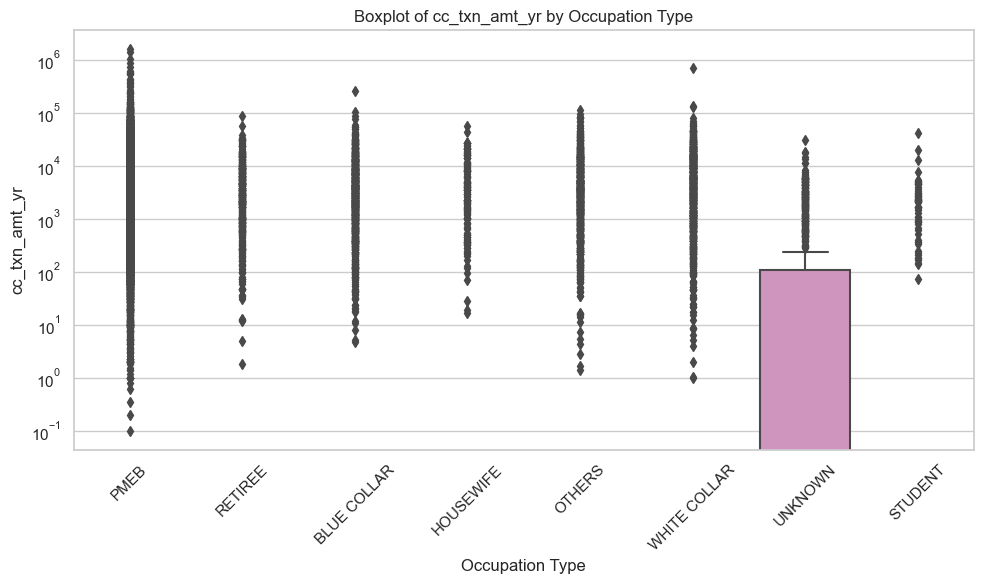

In [52]:
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.boxplot(x='c_occ', y='cc_txn_amt_yr', data=df_l1)

# Set labels and title
plt.xlabel('Occupation Type')
plt.ylabel('cc_txn_amt_yr')
plt.title('Boxplot of cc_txn_amt_yr by Occupation Type')
plt.yscale('log')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [53]:
distinct_values = df_l1['c_occ'].unique()
print(distinct_values)
print(df_l1['c_occ'].value_counts())

['PMEB' 'RETIREE' 'BLUE COLLAR' 'HOUSEWIFE' 'OTHERS' 'WHITE COLLAR'
 'UNKNOWN' 'STUDENT']
c_occ
PMEB            34912
BLUE COLLAR      7552
HOUSEWIFE        5868
OTHERS           5754
WHITE COLLAR     5115
RETIREE          4800
STUDENT          1204
UNKNOWN           878
Name: count, dtype: int64


In [54]:
c_occ_mapping = {'UNKNOWN': 0, 'OTHERS': 1,
                 'STUDENT': 2, 'HOUSEWIFE': 3, 'BLUE COLLAR': 4,
                 'WHITE COLLAR': 5, 'PMEB':6, 'RETIREE': 7}
df_l1['c_occ_encoded'] = df_l1['c_occ'].map(c_occ_mapping)
print(df_l1['c_occ_encoded'].value_counts())

c_occ_encoded
6    34912
4     7552
3     5868
1     5754
5     5115
7     4800
2     1204
0      878
Name: count, dtype: int64
